# Credit Card Fraud Detection using Logistic Regression

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix
import seaborn as sns

#manage warnings
import warnings
warnings.filterwarnings('ignore')

## Exploring the Credit Card Data

In [3]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

##### Only 492 are fraudulent therefore the data needs to be balanced.

## Balancing the Dataset

In [14]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

legit.shape, fraud.shape

((284315, 31), (492, 31))

In [15]:
legit = legit.sample(n=492)
legit.shape, fraud.shape

((492, 31), (492, 31))

In [17]:
# Into DataFrame
newdata= pd.concat([legit, fraud], axis = 0)
newdata.shape

(984, 31)

In [18]:
newdata.Class.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [19]:
newdata.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93193.063008,-0.167689,-0.274884,-0.070622,-0.035450,0.076106,-0.013188,-0.011354,0.025214,0.089550,...,0.033838,0.013880,-0.028922,-0.081751,-0.016593,0.026209,-0.000593,0.016857,0.029515,115.124228
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Spliting the data for Training and Testing

In [20]:
X = newdata.drop(columns = 'Class', axis = 1)
y = newdata.Class

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)

In [23]:
X.shape, X_train.shape, X_test.shape

((984, 30), (787, 30), (197, 30))

In [24]:
y.shape, y_train.shape, y_test.shape

((984,), (787,), (197,))

### Model Training using logistic regression

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

### Evaluating the model

In [34]:
# Training Accuracy 
X_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(X_train_pred, y_train)

print('Accuracy of the training data: {:.2f}%'.format(training_accuracy * 100))

Accuracy of the training data: 94.54%


In [35]:
# Testing Accuracy
X_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(X_test_pred, y_test)

print('Accuracy of the training data: {:.2f}%'.format(test_accuracy * 100))

Accuracy of the training data: 91.88%


## Visualizing the Perfomance of the model

### 1. ROC curve

In [46]:
fpr_train, tpr_train, _ = roc_curve(y_train, X_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, X_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

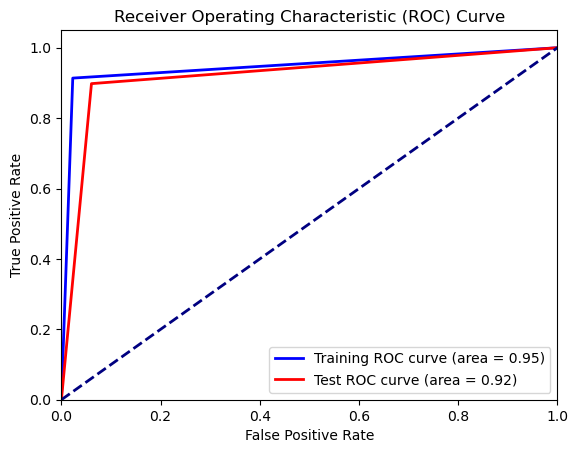

In [39]:
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Training ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 2. Precision-Recall Curve for Training and Test data

In [44]:
precision_train, recall_train, _ = precision_recall_curve(y_train, X_train_pred)
precision_test, recall_test, _ = precision_recall_curve(y_test, X_test_pred)


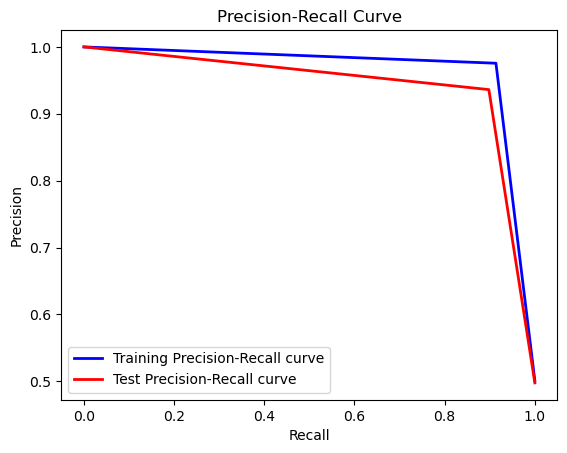

In [45]:
plt.figure()
plt.plot(recall_train, precision_train, color='blue', lw=2, label='Training Precision-Recall curve')
plt.plot(recall_test, precision_test, color='red', lw=2, label='Test Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
